### import libraries

In [1]:
import numpy as np
import pandas as pd

### Load dataset

In [2]:
dataset = pd.read_csv('D:/SLIIT/Y3S2/FDM/project/diabetes_prediction_dataset.csv')
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


### get the number of rows and columns

In [3]:
dataset.shape

(100000, 9)

### get the column data types

In [4]:
dataset.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

### get a count of the empty values for each columns

In [5]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### check for any missing or null value 

In [6]:
dataset.isnull().values.any()

False

### check duplicate values

In [7]:
duplicate = dataset.duplicated()

In [8]:
print(duplicate)

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


### clean duplicate data

In [9]:
dataset = dataset.drop_duplicates()
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### check count of rows with 'No info' in 'smoking_history' column

In [10]:
count_no_info = (dataset['smoking_history'] == 'No Info').sum()

print(f"Count of rows with 'No info' in 'Smoking history' column: {count_no_info}")

Count of rows with 'No info' in 'Smoking history' column: 32887


### drop 'No Info' rows

In [11]:
dataset.drop(dataset[dataset['smoking_history'] == 'No Info'].index, inplace=True)

In [12]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [13]:
dataset = dataset.reset_index(drop=True)
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
63254,Female,26.0,0,0,never,34.34,6.5,160,0
63255,Female,40.0,0,0,never,40.69,3.5,155,0
63256,Male,66.0,0,0,former,27.83,5.7,155,0
63257,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:
dataset.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
5,Female,44.0,0,0,never,19.31,6.5,200,1
6,Male,42.0,0,0,never,33.64,4.8,145,0
7,Female,32.0,0,0,never,27.32,5.0,100,0
8,Female,53.0,0,0,never,27.32,6.1,85,0
9,Female,54.0,0,0,former,54.70,6.0,100,0


### get a count of the number of diabetes patients

In [15]:
dataset['diabetes'].value_counts()

0    56222
1     7037
Name: diabetes, dtype: int64

### visualize

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

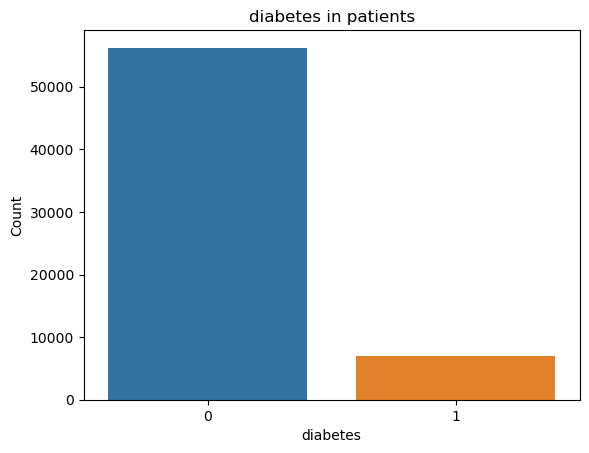

In [17]:
sns.countplot(x='diabetes', data=dataset)

plt.xlabel('diabetes')
plt.ylabel('Count')
plt.title('diabetes in patients')

plt.show()

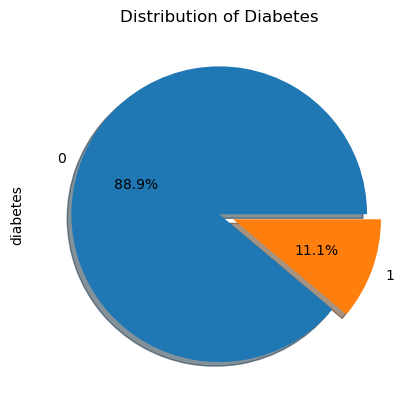

In [18]:
dataset.diabetes.value_counts().plot(kind = 'pie', autopct = '%1.1f%%',explode = [0, 0.1], shadow = True)
plt.title('Distribution of Diabetes')
plt.show()

We can see that only 8.5% of patients are diabetic.

### ploting categorical features alongiside target feature

### Distribution of Diabetes status within Gender

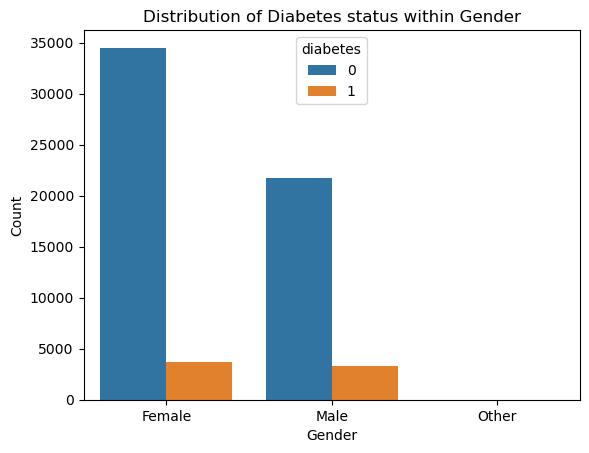

In [19]:
sns.countplot(x="gender", data=dataset, hue="diabetes")

plt.title("Distribution of Diabetes status within Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

### Distribution of Diabetes status within Heart Disease

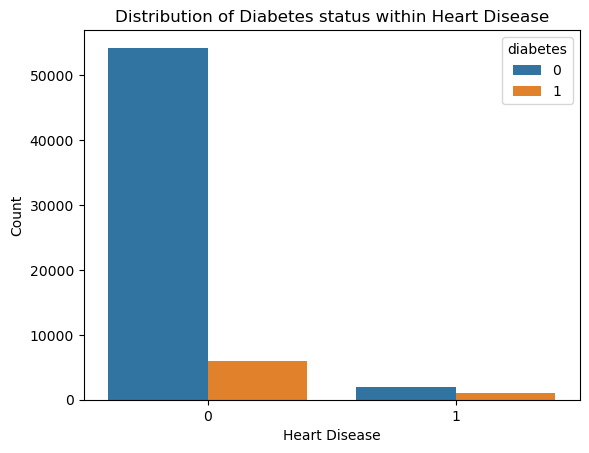

In [20]:
sns.countplot(x="heart_disease", hue = 'diabetes',data=dataset)

plt.title("Distribution of Diabetes status within Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

plt.show()

### Distribution of Diabetes status within Hypertension

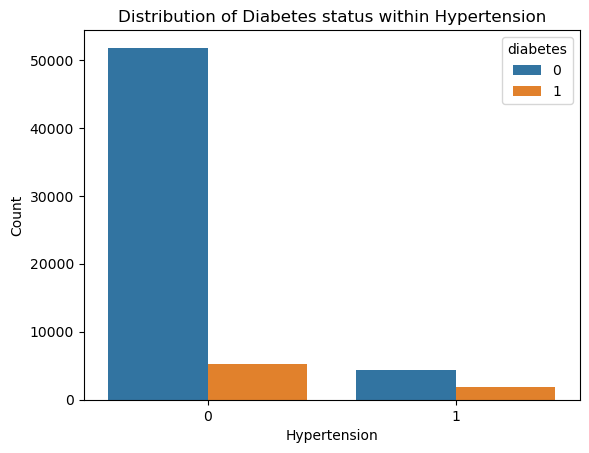

In [21]:
sns.countplot(x="hypertension", data=dataset, hue = 'diabetes')
plt.title("Distribution of Diabetes status within Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Count")

plt.show()

### Distribution of Diabetes status within Smoking History

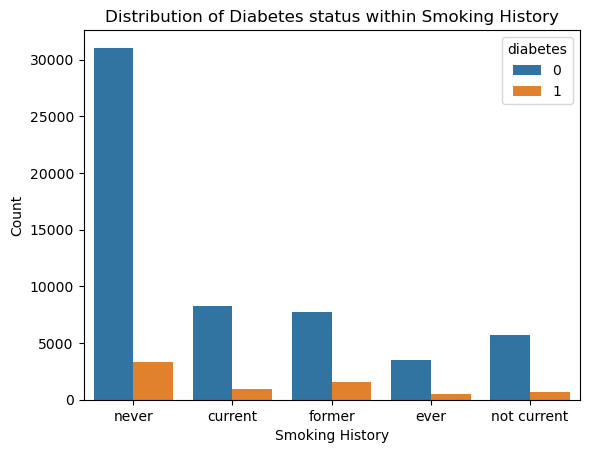

In [22]:
sns.countplot(x="smoking_history", data=dataset, hue = 'diabetes')
plt.title("Distribution of Diabetes status within Smoking History")
plt.xlabel("Smoking History")
plt.ylabel("Count")

plt.show()

In [23]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


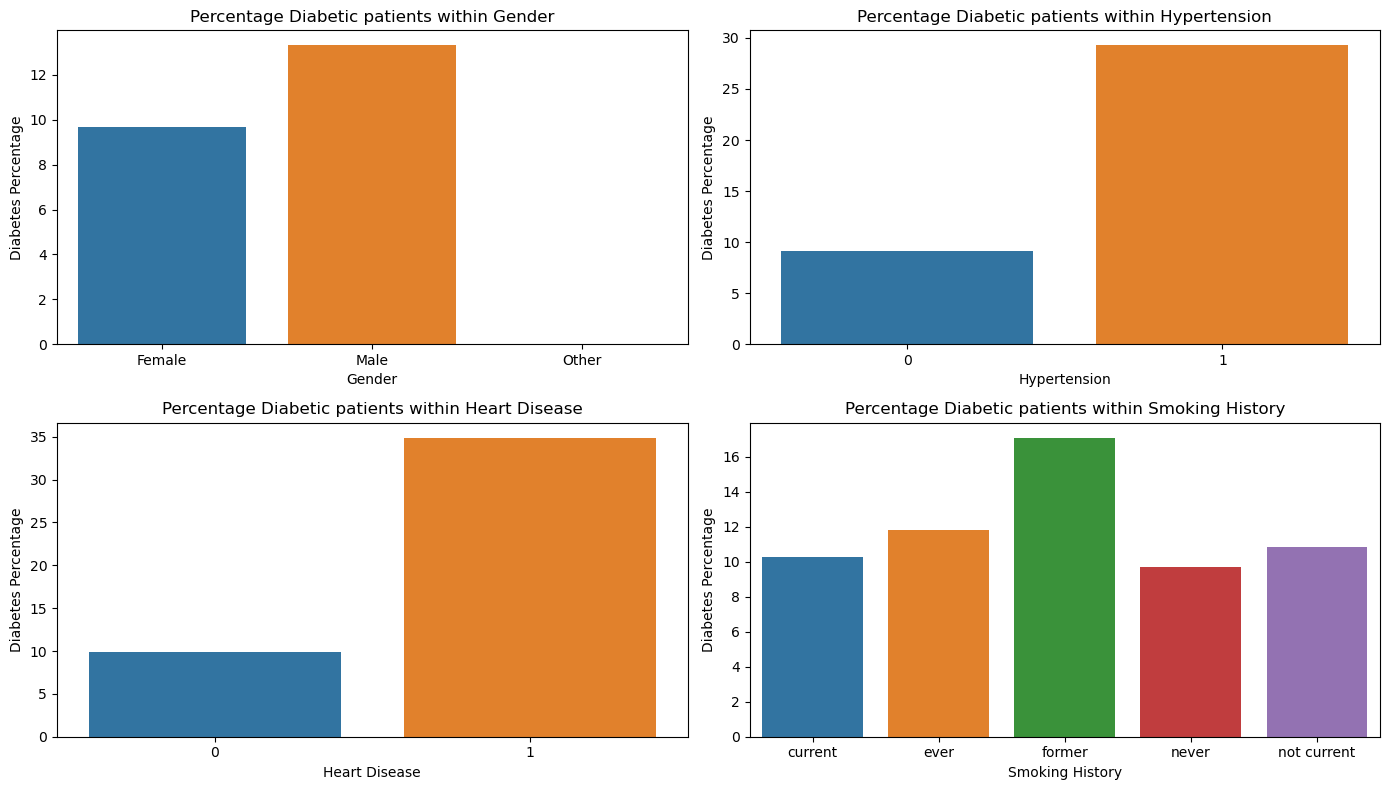

In [26]:
# Calculate the percentage of diabetes status within each category
gender_percentages = dataset.groupby('gender')['diabetes'].mean() * 100
hypertension_percentages = dataset.groupby('hypertension')['diabetes'].mean() * 100
heart_disease_percentages = dataset.groupby('heart_disease')['diabetes'].mean() * 100
smoking_history_percentages = dataset.groupby('smoking_history')['diabetes'].mean() * 100

# Plotting categorical features alongside target feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Chart 1: Distribution of gender
sns.barplot(x=gender_percentages.index, y=gender_percentages.values, ax=axes[0, 0])
axes[0, 0].set_title("Percentage Diabetic patients within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Diabetes Percentage")

# Chart 2: Distribution of hypertension
sns.barplot(x=hypertension_percentages.index, y=hypertension_percentages.values, ax=axes[0, 1])
axes[0, 1].set_title("Percentage Diabetic patients within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Diabetes Percentage")

# Chart 3: Distribution of heart disease
sns.barplot(x=heart_disease_percentages.index, y=heart_disease_percentages.values, ax=axes[1, 0])
axes[1, 0].set_title("Percentage Diabetic patients within Heart Disease")
axes[1, 0].set_xlabel("Heart Disease")
axes[1, 0].set_ylabel("Diabetes Percentage")

# Chart 4: Distribution of smoking history
sns.barplot(x=smoking_history_percentages.index, y=smoking_history_percentages.values, ax=axes[1, 1])
axes[1, 1].set_title("Percentage Diabetic patients within Smoking History")
axes[1, 1].set_xlabel("Smoking History")
axes[1, 1].set_ylabel("Diabetes Percentage")

plt.tight_layout()
plt.show()

### ploting numerical features alongiside target feature

### Distribution of numeric features

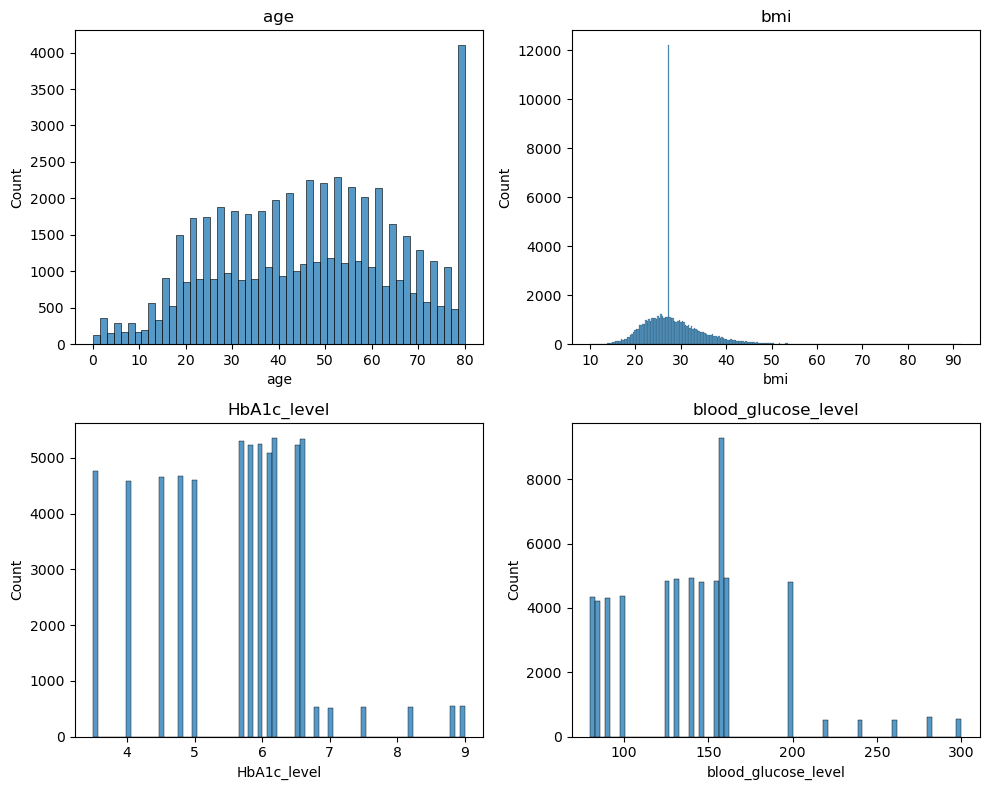

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# List of numeric feature columns
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Loop through numeric features and plot them
for i, feature in enumerate(numeric_features):
    row = i // 2
    col = i % 2
    
    sns.histplot(dataset[feature], ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### print all of the columns and their unique values

In [25]:
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        print(str(column) + ' : ' + str(dataset[column].unique()))
        print(dataset[column].value_counts())
        print('--------------------------------------------------------------------------------')

gender : ['Female' 'Male' 'Other']
Female    38192
Male      25055
Other        12
Name: gender, dtype: int64
--------------------------------------------------------------------------------
smoking_history : ['never' 'current' 'former' 'ever' 'not current']
never          34398
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64
--------------------------------------------------------------------------------


In [26]:
dataset.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


### get the correlation

In [27]:
dataset.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.253205,0.239489,0.162386,0.118019,0.117947,0.262481
hypertension,0.253205,1.000000,0.116703,0.129540,0.086996,0.087115,0.191552
heart_disease,0.239489,0.116703,1.000000,0.037289,0.072939,0.078933,0.169052
bmi,0.162386,0.129540,0.037289,1.000000,0.085025,0.095095,0.203939
HbA1c_level,0.118019,0.086996,0.072939,0.085025,1.000000,0.196032,0.440889
blood_glucose_level,0.117947,0.087115,0.078933,0.095095,0.196032,1.000000,0.451332
diabetes,0.262481,0.191552,0.169052,0.203939,0.440889,0.451332,1.000000


### visualize the correlation

<AxesSubplot:>

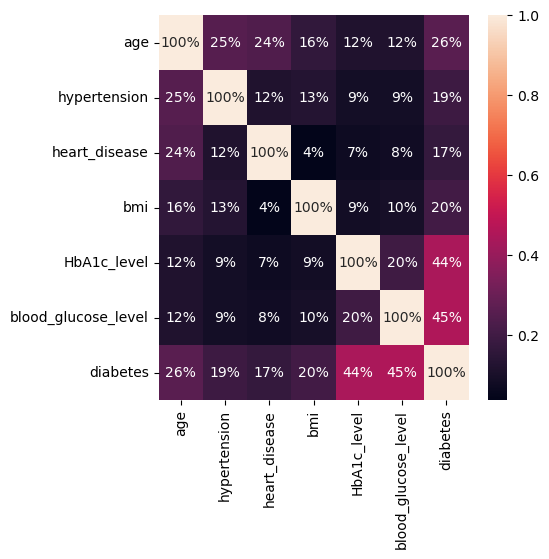

In [28]:
plt.figure(figsize= (5,5))
sns.heatmap(dataset.corr(), annot=True, fmt= '.0%')

In [29]:
dataset["gender"].value_counts()

Female    38192
Male      25055
Other        12
Name: gender, dtype: int64

### drop rows with a "other" value

In [30]:
dataset = dataset[dataset['gender'] != 'Other']
dataset.reset_index(drop=True, inplace=True)

In [31]:
dataset["gender"].value_counts()

Female    38192
Male      25055
Name: gender, dtype: int64

In [32]:
dataset["smoking_history"].value_counts()

never          34395
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [33]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0


In [34]:
# Define a mapping for Gender
gender_mapping = {'Male': 0, 'Female': 1}

# Use the map function to convert Gender column
dataset['gender'] = dataset['gender'].map(gender_mapping)

# Define a mapping for smoking history
smoking_history_mapping = {'never': 0, 'former': 1 , 'current':2 , 'not current' : 3 , "ever" : 4}

# Use the map function to convert Gender column
dataset['smoking_history'] = dataset['smoking_history'].map(smoking_history_mapping)

C:\Users\dulara\AppData\Local\Temp\ipykernel_2648\1829781541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['gender'] = dataset['gender'].map(gender_mapping)
C:\Users\dulara\AppData\Local\Temp\ipykernel_2648\1829781541.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['smoking_history'] = dataset['smoking_history'].map(smoking_history_mapping)


In [35]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,0,28.0,0,0,0,27.32,5.7,158,0
2,1,36.0,0,0,2,23.45,5.0,155,0
3,0,76.0,1,1,2,20.14,4.8,155,0
4,1,20.0,0,0,0,27.32,6.6,85,0


### split data into training and testing

In [36]:
from sklearn.model_selection import train_test_split

X = dataset.drop('diabetes',axis='columns')
y = dataset['diabetes']


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
X_train.shape

(50597, 8)

In [38]:
y_test.value_counts()

0    11236
1     1414
Name: diabetes, dtype: int64

### Model : Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(n_estimators=50) # trees
model_1.fit(X_train , y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
model_1.score(X_test , y_test)

0.9586561264822134

In [41]:
y_predicted_1 = model_1.predict(X_test)

### Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm1 = confusion_matrix(y_test , y_predicted_1)
print(cm1)

[[11170    66]
 [  457   957]]


Text(95.72222222222221, 0.5, 'Truth')

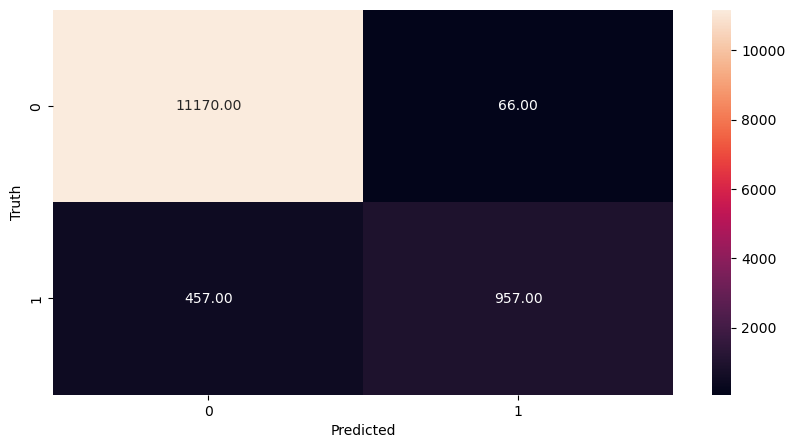

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm1, annot=True , fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest: Classification Report

In [44]:
report1 = classification_report(y_test, y_predicted_1)
print(report1)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     11236
           1       0.94      0.68      0.79      1414

    accuracy                           0.96     12650
   macro avg       0.95      0.84      0.88     12650
weighted avg       0.96      0.96      0.96     12650



### Model: Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()


In [46]:
model_2.fit(X_train , y_train)

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
### accuracy checking
model_2.score(X_test , y_test)

0.9159683794466403

In [48]:
# confusion metrix
y_predicted_2 = model_2.predict(X_test)
cm2 = confusion_matrix(y_test , y_predicted_2)
print(cm2)


[[10875   361]
 [  702   712]]


### Logistic Regression Classification Report

In [49]:
report2 = classification_report(y_test, y_predicted_2)
print(report2)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11236
           1       0.66      0.50      0.57      1414

    accuracy                           0.92     12650
   macro avg       0.80      0.74      0.76     12650
weighted avg       0.91      0.92      0.91     12650



Text(50.722222222222214, 0.5, 'Truth')

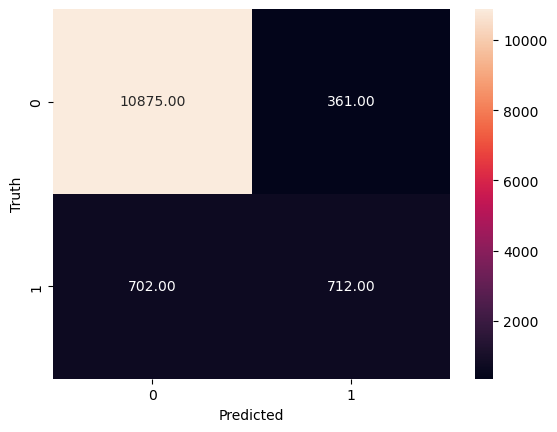

In [50]:
sn.heatmap(cm2, annot=True , fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model : Decision Tree

In [51]:
from sklearn import tree

model_3 = tree.DecisionTreeClassifier()

In [52]:
model_3.fit(X_train , y_train)

DecisionTreeClassifier()

In [53]:
model_3.score(X_test , y_test)

0.9354150197628458

In [54]:
# confusion metrix
y_predicted_3 = model_3.predict(X_test)
cm3 = confusion_matrix(y_test , y_predicted_3)
print(cm3)

[[10813   423]
 [  394  1020]]


### Decision Tree Classification Report

In [55]:
report3 = classification_report(y_test, y_predicted_3)
print(report3)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11236
           1       0.71      0.72      0.71      1414

    accuracy                           0.94     12650
   macro avg       0.84      0.84      0.84     12650
weighted avg       0.94      0.94      0.94     12650



Text(50.722222222222214, 0.5, 'Truth')

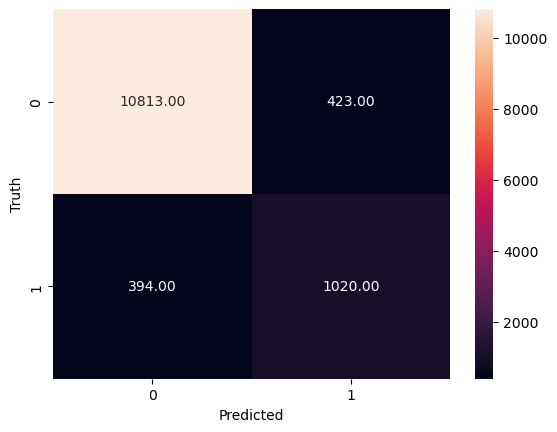

In [56]:
sn.heatmap(cm3, annot=True , fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model : SVM Classifier

In [57]:
from sklearn.svm import SVC
model_4 = SVC()

In [58]:
model_4.fit(X_train , y_train)

SVC()

In [59]:
model_4.score(X_test , y_test)

0.9310671936758893

In [60]:
# confusion metrix
y_predicted_4 = model_4.predict(X_test)
cm4 = confusion_matrix(y_test , y_predicted_4)
print(cm4)

[[11236     0]
 [  872   542]]


### SVM Classification Report

In [61]:
report4 = classification_report(y_test, y_predicted_4)
print(report4)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11236
           1       1.00      0.38      0.55      1414

    accuracy                           0.93     12650
   macro avg       0.96      0.69      0.76     12650
weighted avg       0.94      0.93      0.92     12650



Text(50.722222222222214, 0.5, 'Truth')

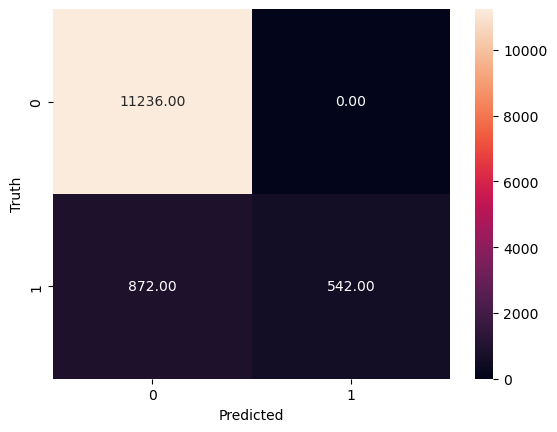

In [62]:
sn.heatmap(cm4, annot=True , fmt=".2f")
plt.xlabel('Predicted')
plt.ylabel('Truth')